# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

## Fixing Target values

In [2]:
# Combine features and target into a single DataFrame
df = pd.read_csv('data.csv', delimiter=';')

# Encode target variable
mapping = {'Graduate': 0, 'Dropout': 1, 'Enrolled': 2}
df['Target_encoded'] = df['Target'].map(mapping)

In [3]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Target_encoded
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate,0
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout,1
4421,1,1,1,9500,1,1,154.0,1,37,37,...,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout,1
4422,1,1,1,9147,1,1,180.0,1,37,37,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate,0


## Train-test spliting for original dataset

In [4]:
# Drop the original target column
df = df.drop('Target', axis=1)

# Split the data into features and target
X = df.drop(columns=['Target_encoded'])
y = df['Target_encoded']

# Split the data into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=17)

# Basic and Advanced params for models

In [5]:
# Define common parameters for models
common_params = {
    'max_depth': 9,
    'learning_rate': 0.01,
    'n_estimators': 200
}

In [6]:

catboost_params = {
    'iterations': 1000,
    'learning_rate': 0.01,
    'depth': 8,
    'l2_leaf_reg': 3,
    'border_count': 128,
    'verbose': 0
}

# XGBoost-specific parameters
xgboost_params = {
    'n_estimators': 500,
    'learning_rate': 0.01,
    'max_depth': 8,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0.1,
    'reg_alpha': 1,
    'reg_lambda': 1,
    'use_label_encoder': False,
    'eval_metric': 'logloss'
}

# Random Forest-specific parameters
randomforest_params = {
    'n_estimators': 500,
    'max_depth': 12,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'bootstrap': True,
    'oob_score': True
}

# Models with basic params and advanced ones

In [7]:
# Define models
models = {
    'CatBoost': CatBoostClassifier(verbose=0, random_state=17),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=17),
    'RandomForest': RandomForestClassifier(random_state=17)
}

In [8]:
better_models = {
    'CatBoost': CatBoostClassifier(random_state=17, **catboost_params),
    'XGBoost': XGBClassifier(random_state=17, **xgboost_params),
    'RandomForest': RandomForestClassifier(random_state=17, **randomforest_params)
}

# Evaluating model function

In [9]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred_proba': y_pred_proba
    }

In [10]:
# Evaluate models on full dataset
results_full = {}
for model_name, model in models.items():
    print(f"Training {model_name} on full dataset...")
    results_full[model_name] = evaluate_model(model, X_train_full, y_train_full, X_test_full, y_test_full)

Training CatBoost on full dataset...
Training XGBoost on full dataset...


D:\LLM_exp\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:54:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training RandomForest on full dataset...


# Plotting results for Original Dataset
## *Basic params*

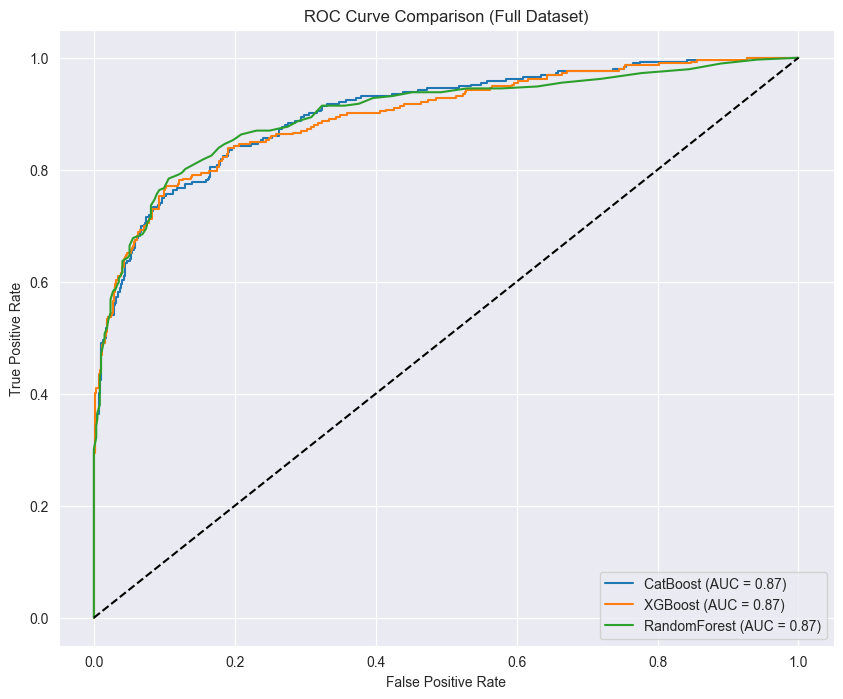

In [11]:
# Plot ROC curves for full dataset
plt.figure(figsize=(10, 8))
for model_name, result in results_full.items():
    fpr, tpr, _ = roc_curve(y_test_full, result['y_pred_proba'][:, 1], pos_label=1)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Full Dataset)')
plt.legend(loc='lower right')
plt.show()

In [12]:
results_full_better = {}
for better_model_name, better_model in better_models.items():
    print(f"Training {better_model_name} on full dataset...")
    results_full_better[better_model_name] = evaluate_model(better_model, X_train_full, y_train_full, X_test_full, y_test_full)

Training CatBoost on full dataset...
Training XGBoost on full dataset...


D:\LLM_exp\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:55:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training RandomForest on full dataset...


## *Advanced params*

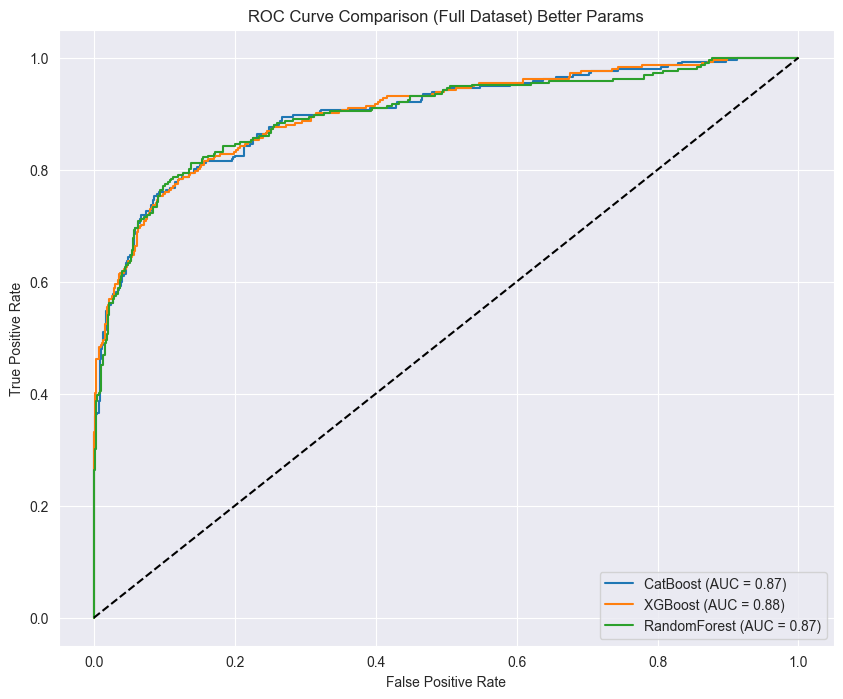

In [13]:
# Plot ROC curves for full dataset
plt.figure(figsize=(10, 8))
for better_model_name, better_result in results_full_better.items():
    fpr, tpr, _ = roc_curve(y_test_full, better_result['y_pred_proba'][:, 1], pos_label=1)
    plt.plot(fpr, tpr, label=f'{better_model_name} (AUC = {better_result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Full Dataset) Better Params')
plt.legend(loc='lower right')
plt.show()

In [14]:
# Print results for full dataset
for model_name, result in results_full.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1-Score: {result['f1']:.4f}")
    print(f"ROC-AUC: {result['roc_auc']:.4f}")


Model: CatBoost
Accuracy: 0.7503
Precision: 0.7419
Recall: 0.7503
F1-Score: 0.7441
ROC-AUC: 0.8726

Model: XGBoost
Accuracy: 0.7469
Precision: 0.7400
Recall: 0.7469
F1-Score: 0.7407
ROC-AUC: 0.8713

Model: RandomForest
Accuracy: 0.7729
Precision: 0.7652
Recall: 0.7729
F1-Score: 0.7631
ROC-AUC: 0.8745


In [15]:
for better_model_name, better_result in results_full_better.items():
    print(f"\nModel: {better_model_name}")
    print(f"Accuracy: {better_result['accuracy']:.4f}")
    print(f"Precision: {better_result['precision']:.4f}")
    print(f"Recall: {better_result['recall']:.4f}")
    print(f"F1-Score: {better_result['f1']:.4f}")
    print(f"ROC-AUC: {better_result['roc_auc']:.4f}")


Model: CatBoost
Accuracy: 0.7661
Precision: 0.7519
Recall: 0.7661
F1-Score: 0.7540
ROC-AUC: 0.8715

Model: XGBoost
Accuracy: 0.7638
Precision: 0.7539
Recall: 0.7638
F1-Score: 0.7542
ROC-AUC: 0.8775

Model: RandomForest
Accuracy: 0.7650
Precision: 0.7507
Recall: 0.7650
F1-Score: 0.7509
ROC-AUC: 0.8702


# Making sliced dataset

In [16]:
# Slice the dataset
df_sliced = df.sample(frac=0.1, random_state=17)
X_sliced = df_sliced.drop('Target_encoded', axis=1)
y_sliced = df_sliced['Target_encoded']

In [17]:
# Split the sliced data into training and testing sets
X_train_sliced, X_test_sliced, y_train_sliced, y_test_sliced = train_test_split(X_sliced, y_sliced, test_size=0.2, random_state=17)

In [18]:
# Evaluate models on sliced dataset
results_sliced = {}
for model_name, model in models.items():
    print(f"Training {model_name} on sliced dataset...")
    results_sliced[model_name] = evaluate_model(model, X_train_sliced, y_train_sliced, X_test_full, y_test_full)

Training CatBoost on sliced dataset...
Training XGBoost on sliced dataset...
Training RandomForest on sliced dataset...


D:\LLM_exp\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:55:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [19]:
better_results_sliced = {}
for better_model_name, better_model in better_models.items():
    print(f"Training {better_model_name} on sliced dataset...")
    better_results_sliced[better_model_name] = evaluate_model(better_model, X_train_sliced, y_train_sliced, X_test_full, y_test_full)

Training CatBoost on sliced dataset...
Training XGBoost on sliced dataset...


D:\LLM_exp\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:55:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training RandomForest on sliced dataset...


# *Slicecd Dataset*
## *Basic params*

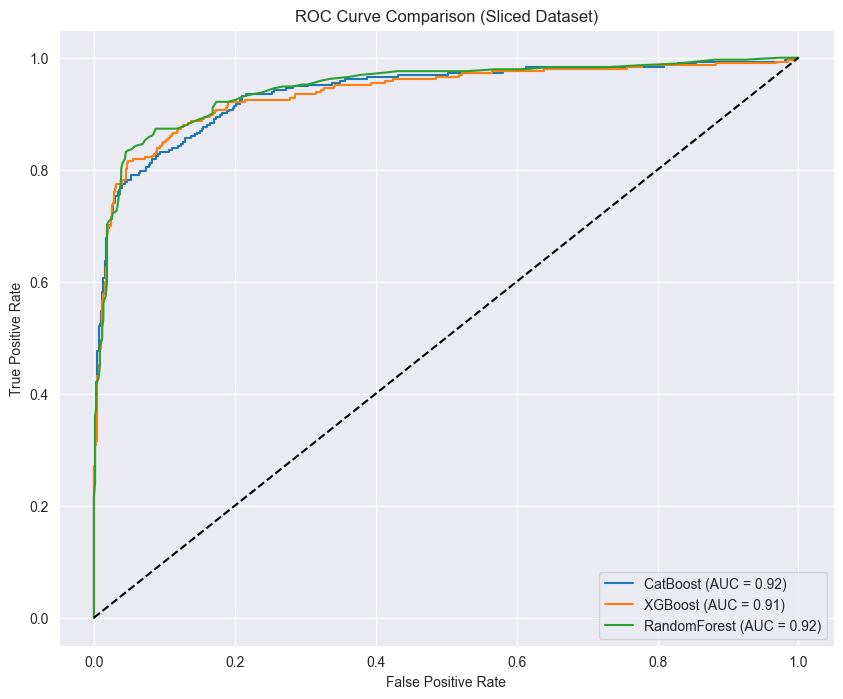

In [20]:
# Plot ROC curves for sliced dataset
plt.figure(figsize=(10, 8))
for model_name, result in results_sliced.items():
    fpr, tpr, _ = roc_curve(y_test_full, result['y_pred_proba'][:, 1], pos_label=1)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Sliced Dataset)')
plt.legend(loc='lower right')
plt.show()

## *Advanced params*

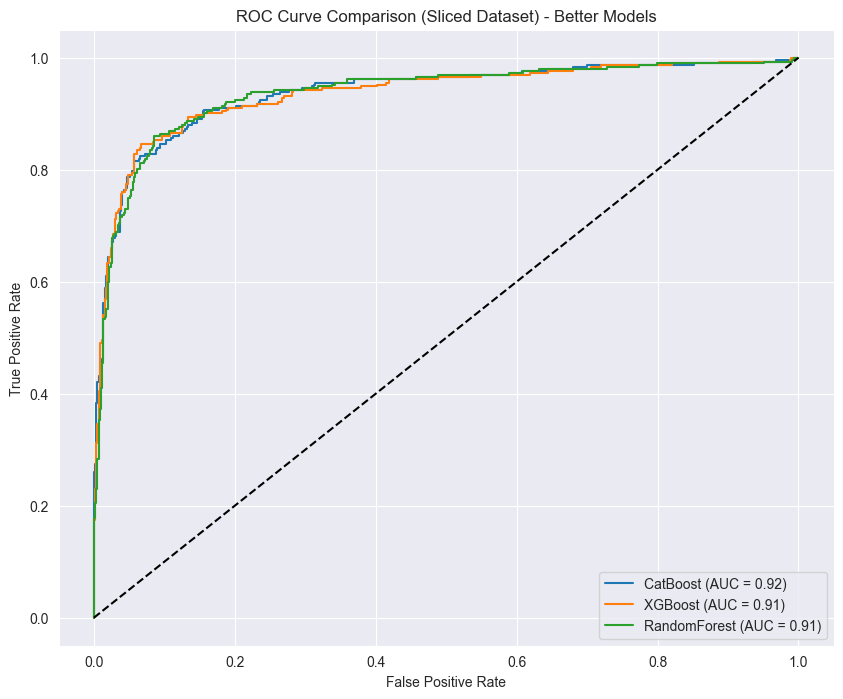

In [21]:
plt.figure(figsize=(10, 8))
for better_model_name, better_result in better_results_sliced.items():
    fpr, tpr, _ = roc_curve(y_test_full, better_result['y_pred_proba'][:, 1], pos_label=1)
    plt.plot(fpr, tpr, label=f'{better_model_name} (AUC = {better_result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Sliced Dataset) - Better Models')
plt.legend(loc='lower right')
plt.show()

In [22]:
# Print results for sliced dataset
for model_name, result in results_sliced.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1-Score: {result['f1']:.4f}")
    print(f"ROC-AUC: {result['roc_auc']:.4f}")


Model: CatBoost
Accuracy: 0.8192
Precision: 0.8154
Recall: 0.8192
F1-Score: 0.8117
ROC-AUC: 0.9206

Model: XGBoost
Accuracy: 0.8249
Precision: 0.8195
Recall: 0.8249
F1-Score: 0.8204
ROC-AUC: 0.9149

Model: RandomForest
Accuracy: 0.8328
Precision: 0.8295
Recall: 0.8328
F1-Score: 0.8237
ROC-AUC: 0.9248


In [23]:
# Print results for sliced dataset
for better_model_name, better_result in better_results_sliced.items():
    print(f"\nModel: {better_model_name}")
    print(f"Accuracy: {better_result['accuracy']:.4f}")
    print(f"Precision: {better_result['precision']:.4f}")
    print(f"Recall: {better_result['recall']:.4f}")
    print(f"F1-Score: {better_result['f1']:.4f}")
    print(f"ROC-AUC: {better_result['roc_auc']:.4f}")


Model: CatBoost
Accuracy: 0.8237
Precision: 0.8285
Recall: 0.8237
F1-Score: 0.8109
ROC-AUC: 0.9176

Model: XGBoost
Accuracy: 0.8260
Precision: 0.8212
Recall: 0.8260
F1-Score: 0.8183
ROC-AUC: 0.9104

Model: RandomForest
Accuracy: 0.8226
Precision: 0.8232
Recall: 0.8226
F1-Score: 0.8090
ROC-AUC: 0.9131


# Saving sliced dataset

In [24]:
# Save the sliced dataset to a CSV file
df_sliced.to_csv('D:/LLM_exp/df_sliced.csv', index=False)

# Chat-GPT generated dataset

In [25]:
# Load the synthetic dataset generated by GPT
df_gpt = pd.read_csv('D:/LLM_exp/synthetic_dataset.csv')

In [26]:
# Evaluate models on GPT-generated dataset
results_gpt = {}
for model_name, model in models.items():
    print(f"Training {model_name} on GPT-generated dataset...")
    results_gpt[model_name] = evaluate_model(model, X_train_full, y_train_full, X_test_full, y_test_full)

Training CatBoost on GPT-generated dataset...
Training XGBoost on GPT-generated dataset...


D:\LLM_exp\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:55:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training RandomForest on GPT-generated dataset...


# *GPT-dataset basic params*

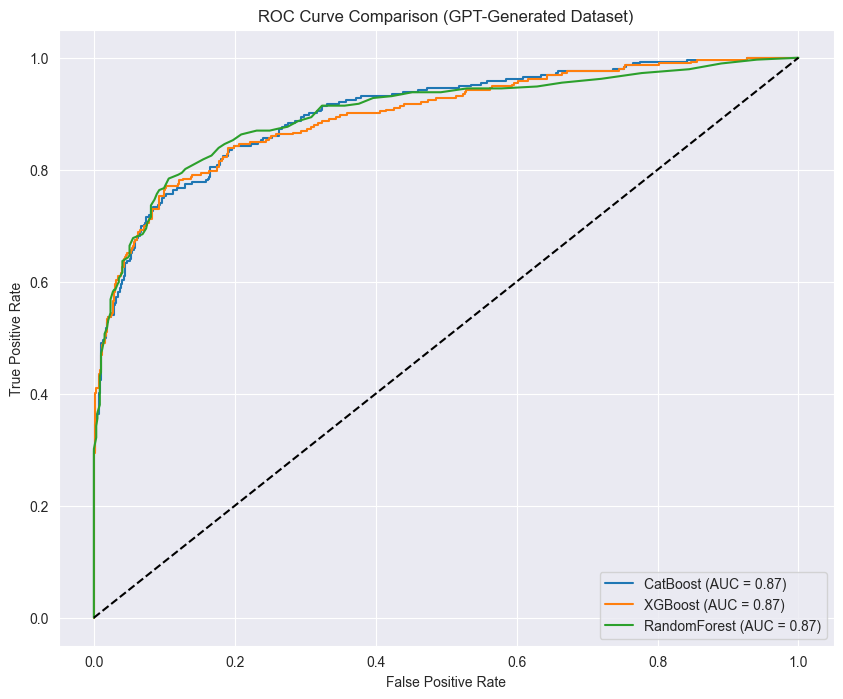

In [27]:
# Plot ROC curves for GPT-generated dataset
plt.figure(figsize=(10, 8))
for model_name, result in results_gpt.items():
    fpr, tpr, _ = roc_curve(y_test_full, result['y_pred_proba'][:, 1], pos_label=1)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (GPT-Generated Dataset)')
plt.legend(loc='lower right')
plt.show()

In [28]:
# Print results for GPT-generated dataset
for model_name, result in results_gpt.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1-Score: {result['f1']:.4f}")
    print(f"ROC-AUC: {result['roc_auc']:.4f}")


Model: CatBoost
Accuracy: 0.7503
Precision: 0.7419
Recall: 0.7503
F1-Score: 0.7441
ROC-AUC: 0.8726

Model: XGBoost
Accuracy: 0.7469
Precision: 0.7400
Recall: 0.7469
F1-Score: 0.7407
ROC-AUC: 0.8713

Model: RandomForest
Accuracy: 0.7729
Precision: 0.7652
Recall: 0.7729
F1-Score: 0.7631
ROC-AUC: 0.8745


## *Deepseek function for generation samples*

In [29]:
# Function to generate a new dataset using resampling (Deepseek)
def generate_new_dataset(original_df, multiplier=10):
    new_data = []
    for _ in range(multiplier):
        resampled_df = resample(original_df, replace=True, n_samples=len(original_df), random_state=np.random.randint(0, 100))
        new_data.append(resampled_df)
    return pd.concat(new_data, ignore_index=True)

## *Copilot function for generation samples (with the second prompt)*

In [30]:
# Function to generate synthetic data (Copilot)
def generate_synthetic_data(data, size_multiplier=10):
    synthetic_data = pd.DataFrame()
    for col in data.columns:
        if col == "Target_encoded":
            synthetic_data[col] = np.random.choice([0, 1, 2], len(data) * size_multiplier)
        elif data[col].dtype in [np.float64, np.int64]:
            synthetic_data[col] = np.random.normal(data[col].mean(), data[col].std(), len(data) * size_multiplier)
        else:
            synthetic_data[col] = np.random.choice(data[col], len(data) * size_multiplier)
    return synthetic_data


In [31]:
# Load the sliced dataset
df_sliced = pd.read_csv('df_sliced.csv')

# Generate deepseek dataset using resampling
df_deepseek = generate_new_dataset(df_sliced, multiplier=10)

# Generate copilot dataset using synthetic data generation
df_copilot = generate_synthetic_data(df_sliced)

## *Dataset preparation*

In [32]:

# Prepare datasets for training and testing
def prepare_datasets(df):
    X = df.drop('Target_encoded', axis=1)
    y = df['Target_encoded']
    return train_test_split(X, y, test_size=0.2, random_state=17)


In [33]:
X_train_deepseek, X_test_deepseek, y_train_deepseek, y_test_deepseek = prepare_datasets(df_deepseek)
X_train_copilot, X_test_copilot, y_train_copilot, y_test_copilot = prepare_datasets(df_copilot)

In [34]:
# Evaluate models on deepseek dataset
results_deepseek = {}
for model_name, model in models.items():
    print(f"Training {model_name} on deepseek dataset...")
    results_deepseek[model_name] = evaluate_model(model, X_train_deepseek, y_train_deepseek, X_test_full, y_test_full)

Training CatBoost on deepseek dataset...
Training XGBoost on deepseek dataset...


D:\LLM_exp\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:55:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training RandomForest on deepseek dataset...


In [35]:
# Evaluate models on copilot dataset
results_copilot = {}
for model_name, model in models.items():
    print(f"Training {model_name} on copilot dataset...")
    results_copilot[model_name] = evaluate_model(model, X_train_copilot, y_train_copilot, X_test_full, y_test_full)

Training CatBoost on copilot dataset...
Training XGBoost on copilot dataset...


D:\LLM_exp\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:55:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training RandomForest on copilot dataset...


# Deepseek result with basic params

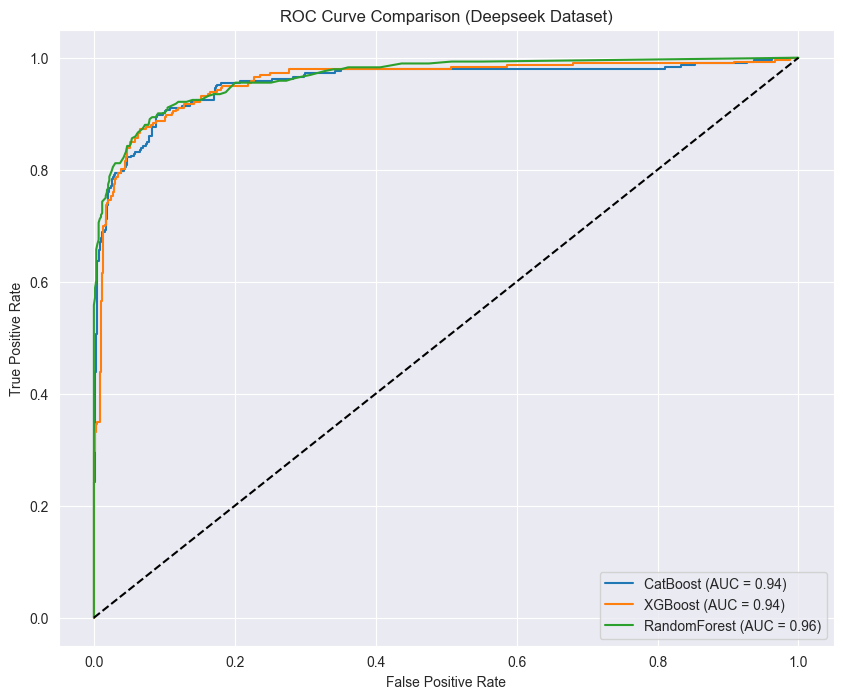

In [36]:
# Plot ROC curves for deepseek dataset
plt.figure(figsize=(10, 8))
for model_name, result in results_deepseek.items():
    fpr, tpr, _ = roc_curve(y_test_full, result['y_pred_proba'][:, 1], pos_label=1)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Deepseek Dataset)')
plt.legend(loc='lower right')
plt.show()


# Copilot with basic params

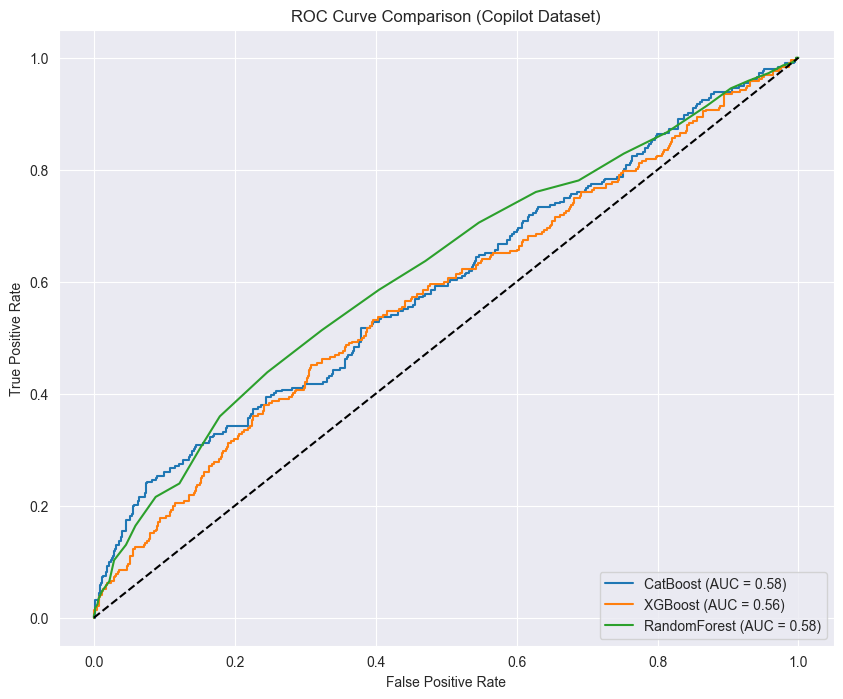

In [37]:
# Plot ROC curves for copilot dataset
plt.figure(figsize=(10, 8))
for model_name, result in results_copilot.items():
    fpr, tpr, _ = roc_curve(y_test_full, result['y_pred_proba'][:, 1], pos_label=1)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {result["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Copilot Dataset)')
plt.legend(loc='lower right')
plt.show()

In [38]:
# Print results for deepseek dataset
print("\nResults for Deepseek Dataset:")
for model_name, result in results_deepseek.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1-Score: {result['f1']:.4f}")
    print(f"ROC-AUC: {result['roc_auc']:.4f}")


Results for Deepseek Dataset:

Model: CatBoost
Accuracy: 0.8644
Precision: 0.8635
Recall: 0.8644
F1-Score: 0.8592
ROC-AUC: 0.9386

Model: XGBoost
Accuracy: 0.8531
Precision: 0.8488
Recall: 0.8531
F1-Score: 0.8484
ROC-AUC: 0.9369

Model: RandomForest
Accuracy: 0.8599
Precision: 0.8592
Recall: 0.8599
F1-Score: 0.8533
ROC-AUC: 0.9557


In [39]:
# Print results for copilot dataset
print("\nResults for Copilot Dataset:")
for model_name, result in results_copilot.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1-Score: {result['f1']:.4f}")
    print(f"ROC-AUC: {result['roc_auc']:.4f}")


Results for Copilot Dataset:

Model: CatBoost
Accuracy: 0.4452
Precision: 0.4743
Recall: 0.4452
F1-Score: 0.4576
ROC-AUC: 0.5785

Model: XGBoost
Accuracy: 0.3729
Precision: 0.4523
Recall: 0.3729
F1-Score: 0.3804
ROC-AUC: 0.5631

Model: RandomForest
Accuracy: 0.3876
Precision: 0.4724
Recall: 0.3876
F1-Score: 0.4090
ROC-AUC: 0.5848


In [40]:
# Evaluate better models on full dataset
better_results_full = {}
for better_model_name, better_model in better_models.items():
    print(f"Training {better_model_name} with better parameters on full dataset...")
    better_results_full[better_model_name] = evaluate_model(better_model, X_train_full, y_train_full, X_test_full, y_test_full)

# Evaluate better models on sliced dataset
better_results_sliced = {}
for better_model_name, better_model in better_models.items():
    print(f"Training {better_model_name} with better parameters on sliced dataset...")
    better_results_sliced[better_model_name] = evaluate_model(better_model, X_train_sliced, y_train_sliced, X_test_full, y_test_full)

# Evaluate better models on GPT-generated dataset
better_results_gpt = {}
for better_model_name, better_model in better_models.items():
    print(f"Training {better_model_name} with better parameters on GPT-generated dataset...")
    better_results_gpt[better_model_name] = evaluate_model(better_model, X_train_full, y_train_full, X_test_full, y_test_full)

# Evaluate better models on deepseek dataset
better_results_deepseek = {}
for better_model_name, better_model in better_models.items():
    print(f"Training {better_model_name} with better parameters on deepseek dataset...")
    better_results_deepseek[better_model_name] = evaluate_model(better_model, X_train_deepseek, y_train_deepseek, X_test_full, y_test_full)

# Evaluate better models on copilot dataset
better_results_copilot = {}
for better_model_name, better_model in better_models.items():
    print(f"Training {better_model_name} with better parameters on copilot dataset...")
    better_results_copilot[better_model_name] = evaluate_model(better_model, X_train_copilot, y_train_copilot, X_test_full, y_test_full)

Training CatBoost with better parameters on full dataset...
Training XGBoost with better parameters on full dataset...


D:\LLM_exp\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:55:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training RandomForest with better parameters on full dataset...
Training CatBoost with better parameters on sliced dataset...
Training XGBoost with better parameters on sliced dataset...


D:\LLM_exp\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:56:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training RandomForest with better parameters on sliced dataset...
Training CatBoost with better parameters on GPT-generated dataset...
Training XGBoost with better parameters on GPT-generated dataset...


D:\LLM_exp\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:57:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training RandomForest with better parameters on GPT-generated dataset...
Training CatBoost with better parameters on deepseek dataset...
Training XGBoost with better parameters on deepseek dataset...


D:\LLM_exp\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:58:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training RandomForest with better parameters on deepseek dataset...
Training CatBoost with better parameters on copilot dataset...
Training XGBoost with better parameters on copilot dataset...


D:\LLM_exp\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:58:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training RandomForest with better parameters on copilot dataset...


# All models plotting results

              Dataset         Model  Accuracy  Precision    Recall  F1-Score  \
0            Original      CatBoost  0.750282   0.741858  0.750282  0.744126   
1            Original       XGBoost  0.746893   0.740024  0.746893  0.740659   
2            Original  RandomForest  0.772881   0.765165  0.772881  0.763118   
3              Sliced      CatBoost  0.819209   0.815402  0.819209  0.811709   
4              Sliced       XGBoost  0.824859   0.819459  0.824859  0.820431   
5              Sliced  RandomForest  0.832768   0.829466  0.832768  0.823747   
6                 GPT      CatBoost  0.750282   0.741858  0.750282  0.744126   
7                 GPT       XGBoost  0.746893   0.740024  0.746893  0.740659   
8                 GPT  RandomForest  0.772881   0.765165  0.772881  0.763118   
9            Deepseek      CatBoost  0.864407   0.863463  0.864407  0.859167   
10           Deepseek       XGBoost  0.853107   0.848817  0.853107  0.848358   
11           Deepseek  RandomForest  0.8

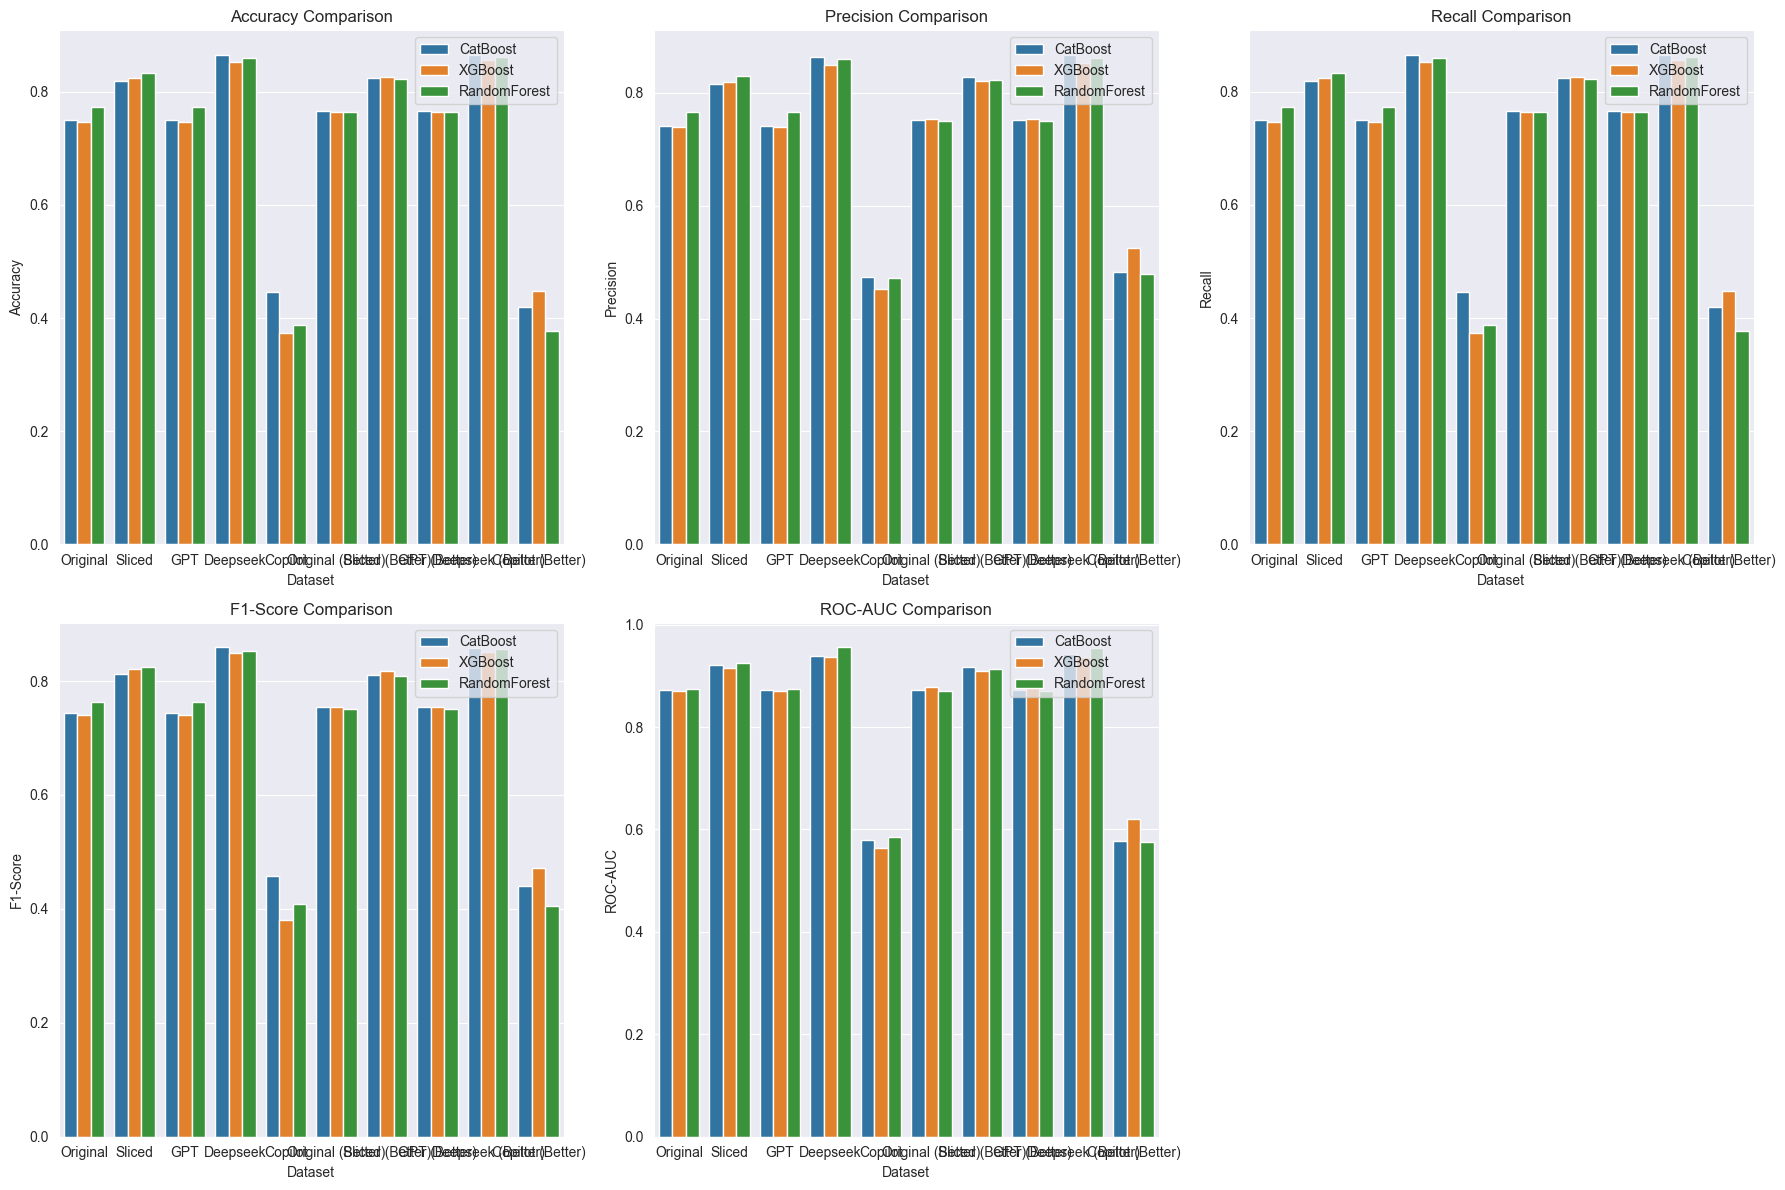

In [41]:
results = {
    'Dataset': [],
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
    'ROC-AUC': []
}


for model_name, result in results_full.items():
    results['Dataset'].append('Original')
    results['Model'].append(model_name)
    results['Accuracy'].append(result['accuracy'])
    results['Precision'].append(result['precision'])
    results['Recall'].append(result['recall'])
    results['F1-Score'].append(result['f1'])
    results['ROC-AUC'].append(result['roc_auc'])

for model_name, result in results_sliced.items():
    results['Dataset'].append('Sliced')
    results['Model'].append(model_name)
    results['Accuracy'].append(result['accuracy'])
    results['Precision'].append(result['precision'])
    results['Recall'].append(result['recall'])
    results['F1-Score'].append(result['f1'])
    results['ROC-AUC'].append(result['roc_auc'])

for model_name, result in results_gpt.items():
    results['Dataset'].append('GPT')
    results['Model'].append(model_name)
    results['Accuracy'].append(result['accuracy'])
    results['Precision'].append(result['precision'])
    results['Recall'].append(result['recall'])
    results['F1-Score'].append(result['f1'])
    results['ROC-AUC'].append(result['roc_auc'])


for model_name, result in results_deepseek.items():
    results['Dataset'].append('Deepseek')
    results['Model'].append(model_name)
    results['Accuracy'].append(result['accuracy'])
    results['Precision'].append(result['precision'])
    results['Recall'].append(result['recall'])
    results['F1-Score'].append(result['f1'])
    results['ROC-AUC'].append(result['roc_auc'])


for model_name, result in results_copilot.items():
    results['Dataset'].append('Copilot')
    results['Model'].append(model_name)
    results['Accuracy'].append(result['accuracy'])
    results['Precision'].append(result['precision'])
    results['Recall'].append(result['recall'])
    results['F1-Score'].append(result['f1'])
    results['ROC-AUC'].append(result['roc_auc'])


for model_name, result in better_results_full.items():
    results['Dataset'].append('Original (Better)')
    results['Model'].append(model_name)
    results['Accuracy'].append(result['accuracy'])
    results['Precision'].append(result['precision'])
    results['Recall'].append(result['recall'])
    results['F1-Score'].append(result['f1'])
    results['ROC-AUC'].append(result['roc_auc'])

for model_name, result in better_results_sliced.items():
    results['Dataset'].append('Sliced (Better)')
    results['Model'].append(model_name)
    results['Accuracy'].append(result['accuracy'])
    results['Precision'].append(result['precision'])
    results['Recall'].append(result['recall'])
    results['F1-Score'].append(result['f1'])
    results['ROC-AUC'].append(result['roc_auc'])

for model_name, result in better_results_gpt.items():
    results['Dataset'].append('GPT (Better)')
    results['Model'].append(model_name)
    results['Accuracy'].append(result['accuracy'])
    results['Precision'].append(result['precision'])
    results['Recall'].append(result['recall'])
    results['F1-Score'].append(result['f1'])
    results['ROC-AUC'].append(result['roc_auc'])

for model_name, result in better_results_deepseek.items():
    results['Dataset'].append('Deepseek (Better)')
    results['Model'].append(model_name)
    results['Accuracy'].append(result['accuracy'])
    results['Precision'].append(result['precision'])
    results['Recall'].append(result['recall'])
    results['F1-Score'].append(result['f1'])
    results['ROC-AUC'].append(result['roc_auc'])

for model_name, result in better_results_copilot.items():
    results['Dataset'].append('Copilot (Better)')
    results['Model'].append(model_name)
    results['Accuracy'].append(result['accuracy'])
    results['Precision'].append(result['precision'])
    results['Recall'].append(result['recall'])
    results['F1-Score'].append(result['f1'])
    results['ROC-AUC'].append(result['roc_auc'])


results_df = pd.DataFrame(results)


print(results_df)


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(data=results_df, x='Dataset', y=metric, hue='Model')
    plt.title(f'{metric} Comparison')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


# Plotting basic params models

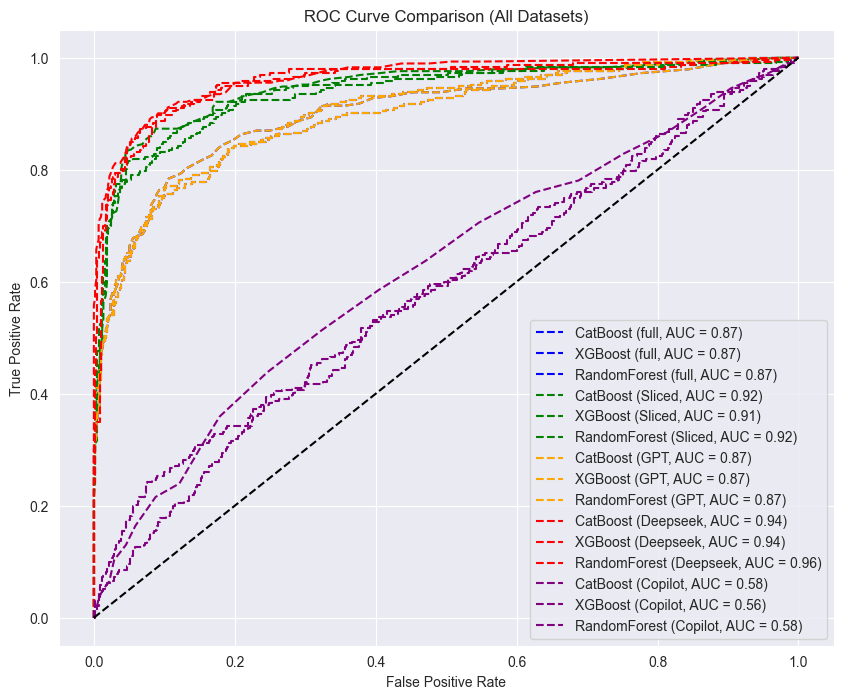

In [42]:
plt.figure(figsize=(10, 8))
for dataset, color in zip(['full', 'Sliced','GPT','Deepseek', 'Copilot'], ['blue', 'green', 'orange','red', 'purple','yellow']):
    for model_name, result in eval(f'results_{dataset.lower()}').items():
        fpr, tpr, _ = roc_curve(y_test_full, result['y_pred_proba'][:, 1], pos_label=1)
        plt.plot(fpr, tpr, label=f'{model_name} ({dataset}, AUC = {result["roc_auc"]:.2f})', color=color, linestyle='--' if dataset != 'Original' else '-')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (All Datasets)')
plt.legend(loc='lower right')
plt.show()

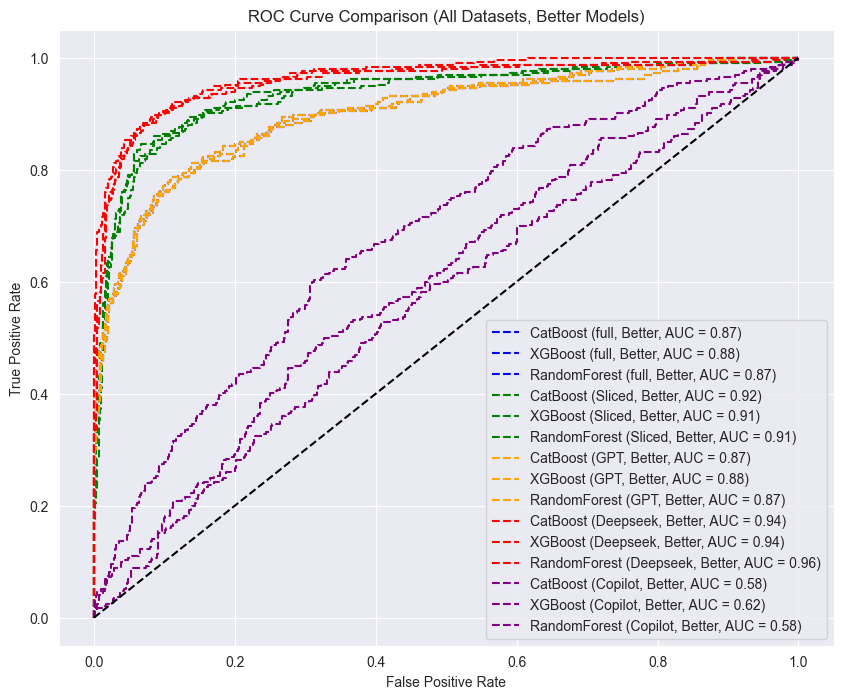

In [43]:
# Plot updated ROC curves
plt.figure(figsize=(10, 8))
for dataset, color in zip(['full', 'Sliced', 'GPT', 'Deepseek', 'Copilot'], ['blue', 'green', 'orange', 'red', 'purple', 'yellow']):
    for model_name, result in eval(f'better_results_{dataset.lower()}').items():
        fpr, tpr, _ = roc_curve(y_test_full, result['y_pred_proba'][:, 1], pos_label=1)
        plt.plot(fpr, tpr, label=f'{model_name} ({dataset}, Better, AUC = {result["roc_auc"]:.2f})', color=color, linestyle='--' if dataset != 'Original' else '-')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (All Datasets, Better Models)')
plt.legend(loc='lower right')
plt.show()

## Result for better params for all datasets

In [44]:
# Print results for better models on full dataset
print("\nResults for Better Models on Full Dataset:")
for model_name, result in better_results_full.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1-Score: {result['f1']:.4f}")
    print(f"ROC-AUC: {result['roc_auc']:.4f}")

# Print results for better models on sliced dataset
print("\nResults for Better Models on Sliced Dataset:")
for model_name, result in better_results_sliced.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1-Score: {result['f1']:.4f}")
    print(f"ROC-AUC: {result['roc_auc']:.4f}")

# Print results for better models on GPT-generated dataset
print("\nResults for Better Models on GPT-Generated Dataset:")
for model_name, result in better_results_gpt.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1-Score: {result['f1']:.4f}")
    print(f"ROC-AUC: {result['roc_auc']:.4f}")

# Print results for better models on deepseek dataset
print("\nResults for Better Models on Deepseek Dataset:")
for model_name, result in better_results_deepseek.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1-Score: {result['f1']:.4f}")
    print(f"ROC-AUC: {result['roc_auc']:.4f}")

# Print results for better models on copilot dataset
print("\nResults for Better Models on Copilot Dataset:")
for model_name, result in better_results_copilot.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F1-Score: {result['f1']:.4f}")
    print(f"ROC-AUC: {result['roc_auc']:.4f}")


Results for Better Models on Full Dataset:

Model: CatBoost
Accuracy: 0.7661
Precision: 0.7519
Recall: 0.7661
F1-Score: 0.7540
ROC-AUC: 0.8715

Model: XGBoost
Accuracy: 0.7638
Precision: 0.7539
Recall: 0.7638
F1-Score: 0.7542
ROC-AUC: 0.8775

Model: RandomForest
Accuracy: 0.7650
Precision: 0.7507
Recall: 0.7650
F1-Score: 0.7509
ROC-AUC: 0.8702

Results for Better Models on Sliced Dataset:

Model: CatBoost
Accuracy: 0.8237
Precision: 0.8285
Recall: 0.8237
F1-Score: 0.8109
ROC-AUC: 0.9176

Model: XGBoost
Accuracy: 0.8260
Precision: 0.8212
Recall: 0.8260
F1-Score: 0.8183
ROC-AUC: 0.9104

Model: RandomForest
Accuracy: 0.8226
Precision: 0.8232
Recall: 0.8226
F1-Score: 0.8090
ROC-AUC: 0.9131

Results for Better Models on GPT-Generated Dataset:

Model: CatBoost
Accuracy: 0.7661
Precision: 0.7519
Recall: 0.7661
F1-Score: 0.7540
ROC-AUC: 0.8715

Model: XGBoost
Accuracy: 0.7638
Precision: 0.7539
Recall: 0.7638
F1-Score: 0.7542
ROC-AUC: 0.8775

Model: RandomForest
Accuracy: 0.7650
Precision: 0.7

In [45]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.680154
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.759359
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


In [46]:
df_sliced.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,...,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,1.167421,18.294118,1.683258,8910.115385,0.909502,4.361991,132.630543,1.859729,17.052036,20.789593,...,0.502262,6.192308,7.830317,4.452489,10.400820,0.128959,11.663348,1.067195,-0.061448,0.671946
std,0.609097,17.262398,1.215598,1992.980304,0.287219,9.945895,12.782673,7.011054,14.976308,15.469774,...,1.738257,2.074931,3.618507,2.897142,5.200203,0.570732,2.570735,1.404313,2.269422,0.739909
min,1.000000,1.000000,1.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,1.000000,3.000000,...,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,0.600000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000,1.000000
max,5.000000,53.000000,6.000000,9991.000000,1.000000,43.000000,182.000000,105.000000,40.000000,40.000000,...,14.000000,17.000000,20.000000,17.000000,16.666667,5.000000,16.200000,3.700000,3.510000,2.000000


In [48]:
df_copilot.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded
count,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,...,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000
mean,1.169342,18.442791,1.682560,8869.850252,0.915024,4.104718,132.468890,1.943227,17.169118,20.549164,...,0.507570,6.183190,7.864500,4.426792,10.399510,0.116601,11.696323,1.095534,-0.068186,1.012217
std,0.613894,17.427734,1.217561,1975.574298,0.287611,10.045084,12.861934,7.054599,14.938071,15.177071,...,1.726681,2.111551,3.654145,2.886177,5.198906,0.568072,2.537748,1.396999,2.277754,0.820828
min,-1.076865,-37.182556,-3.049829,1460.148854,-0.129096,-32.641340,90.585419,-21.728104,-34.036118,-35.385170,...,-5.678019,-0.638360,-5.509709,-5.437019,-7.627726,-1.817856,2.649200,-3.765679,-7.716001,0.000000
25%,0.759330,6.777173,0.863467,7544.300066,0.720354,-2.416011,123.936222,-2.835093,7.053316,10.361904,...,-0.676908,4.748316,5.390642,2.469203,6.949782,-0.263623,9.970166,0.165774,-1.614818,0.000000
50%,1.176446,18.251580,1.666926,8913.637760,0.916807,4.013387,132.499391,1.938300,17.311668,21.011379,...,0.515536,6.174086,7.880770,4.433333,10.364792,0.105506,11.665731,1.147109,-0.038107,1.000000
75%,1.580048,30.021379,2.499085,10235.527434,1.117862,10.688725,140.977266,6.662182,27.336400,30.485570,...,1.672590,7.594771,10.254502,6.411503,13.821973,0.492288,13.366864,2.045222,1.480294,2.000000
max,3.448858,81.209687,5.839402,15716.339199,1.843316,43.050618,179.876568,26.721644,72.307571,69.135735,...,6.514807,12.469380,20.825972,13.425617,29.679648,2.285019,21.464822,6.951538,6.827739,2.000000


In [52]:
df_gpt = pd.read_csv('D:/LLM_exp/synthetic_dataset.csv')

In [53]:
df_gpt.describe()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded
count,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,...,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000
mean,1.159276,18.476697,1.664706,8887.362443,0.914480,4.460407,132.520360,1.880995,16.869231,20.907692,...,0.488914,6.216063,7.717904,4.505204,10.438599,0.130543,11.707489,1.060271,-0.107265,0.676471
std,0.583369,17.313390,1.201859,2048.238672,0.279686,10.134578,12.792340,6.866776,15.006285,15.362883,...,1.717056,2.053960,3.650836,2.816918,5.235437,0.577875,2.578125,1.417859,2.272290,0.742063
min,1.000000,1.000000,1.000000,33.000000,0.000000,1.000000,86.160710,1.000000,1.000000,1.000000,...,0.000000,0.000000,-6.857544,0.000000,-6.574867,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,124.052609,1.000000,1.000000,3.000000,...,0.000000,5.000000,5.265149,3.000000,6.925985,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,132.486810,1.000000,19.000000,19.000000,...,0.000000,6.000000,7.740342,5.000000,10.401450,0.000000,11.100000,0.600000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,141.359255,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.210165,6.000000,14.005395,0.000000,13.900000,2.600000,1.790000,1.000000
max,5.000000,53.000000,6.000000,9991.000000,1.000000,43.000000,180.668433,105.000000,40.000000,40.000000,...,14.000000,17.000000,20.520884,17.000000,28.998620,5.000000,16.200000,3.700000,3.510000,2.000000


In [50]:
df_deepseek.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded
count,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,...,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000,4420.000000
mean,1.160633,17.848869,1.682353,8938.503394,0.917421,4.342986,132.544072,1.876697,17.084615,20.868778,...,0.508371,6.208145,7.886425,4.440724,10.404824,0.123982,11.674751,1.066787,-0.048145,0.670588
std,0.582996,17.205407,1.221000,1927.389336,0.275276,9.995519,13.029829,7.123801,14.920612,15.466071,...,1.742841,2.040909,3.636984,2.897099,5.216702,0.527166,2.553677,1.405387,2.249794,0.730851
min,1.000000,1.000000,1.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,1.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,11.000000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,0.600000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000,1.000000
max,5.000000,53.000000,6.000000,9991.000000,1.000000,43.000000,182.000000,105.000000,40.000000,40.000000,...,14.000000,17.000000,20.000000,17.000000,16.666667,5.000000,16.200000,3.700000,3.510000,2.000000
